In [1]:
import pandas as pd
import numpy as np
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore') 


#set max viewable column
pd.set_option('display.max_columns', 30)


## **Exploratory Data Analysis**

#### Load dataset

In [2]:
music = pd.read_csv(r'/home/dakeshra7/Documents/Altschool Africa/csvfiles/dataset.csv', index_col=0)


#view first 5 rows of the dataset
music.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


### **Data Cleaning**

##### handling missing data

In [3]:
#checking for null data
music.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [4]:
music[music.artists.isna()]

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65900,1kR4gIb7nGxHPI3D2ifs59,NaN,NaN,NaN,0,0,False,0.501,0.583,7,-9.46,0,0.0605,0.69,0.00396,0.0747,0.734,138.391,4,k-pop


we have one role of null value so we will drop it

In [5]:
#dropping null values
music.dropna(inplace=True)

#### Checking unique  ids 

In [6]:
music['track_id'].nunique()

89740

#### duplicate values

In [7]:
duplicated = music[music['track_id'].duplicated(keep = False)]
print(duplicated.shape)


duplicated.groupby('track_id')['track_id'].count()

(40900, 20)


track_id
001APMDOl3qtx1526T11n1    2
001YQlnDSduXd5LgBd66gT    2
003vvx7Niy0yvhvHt4a68B    3
004h8smbIoAkUNDJvVKwkG    2
006rHBBNLJMpQs8fRC2GDe    3
                         ..
7ztSVy67w9rXpKg5L2zN5l    2
7zubR9uYAWjb5KPZTMm85e    4
7zumacGldlmxpoP8bpaeLe    2
7zv2vmZq8OjS54BxFzI2wM    2
7zwn1eykZtZ5LODrf7c0tS    3
Name: track_id, Length: 16641, dtype: int64

The dataset consists of `113,999 rows`, but there are only `89,741 unique track IDs`, indicating that there are duplicate values present. Upon further investigation, we discovered that there are 16,641 distinct songs that appear multiple times in the dataset. To proceed with our analysis, it is necessary to eliminate these duplicate instances and clean the data.

#### drop duplicate rows

In [8]:
#drop duplicates
music = music[music['track_id'].duplicated(keep = 'first') == False]

#recheck for duplicate items
music.duplicated().sum()

0

#### We also observed duplicate tracks from the artists and track name but with different album names 

In [9]:
music.artists.duplicated().sum()

58303

In [10]:
music.track_name.duplicated().sum()

16132

An artists may have different songs in the dataset, hence the rate of duplicates also the same can apply to track_names ( different artists can use thesame track names). To eradicate duplicates, we will subset the artists, track_name to investigate further.

In [11]:
col = ['artists', 'track_name']
music[col].duplicated().sum()

8397

We found `361` tracks where artists and track_names are duplicates. An artists could not possibly release thesame song with the same album and track name more than once except its a remix of that song. Hence, we will drop all tracks in this column.

In [12]:
music.shape

(89740, 20)

In [13]:
music = music.drop_duplicates(subset=col, keep='first')
music[col].duplicated().sum()

0

In [14]:
#here's the shape of our new dataset
music.shape

(81343, 20)

In [15]:
music.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81343 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          81343 non-null  object 
 1   artists           81343 non-null  object 
 2   album_name        81343 non-null  object 
 3   track_name        81343 non-null  object 
 4   popularity        81343 non-null  int64  
 5   duration_ms       81343 non-null  int64  
 6   explicit          81343 non-null  bool   
 7   danceability      81343 non-null  float64
 8   energy            81343 non-null  float64
 9   key               81343 non-null  int64  
 10  loudness          81343 non-null  float64
 11  mode              81343 non-null  int64  
 12  speechiness       81343 non-null  float64
 13  acousticness      81343 non-null  float64
 14  instrumentalness  81343 non-null  float64
 15  liveness          81343 non-null  float64
 16  valence           81343 non-null  float

In [16]:
music.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,2.314145e+05,0.559276,0.635025,5.285900,-8.593930,0.632347,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834,3.896967
std,19.438517,1.164924e+05,0.177747,0.258641,3.557629,5.304797,0.482169,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012,0.456398
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.446000,0.455000,2.000000,-10.451500,0.000000,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000,4.000000
50%,35.000000,2.152050e+05,0.573000,0.678000,5.000000,-7.262000,1.000000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000,4.000000
75%,49.000000,2.673460e+05,0.690000,0.857000,8.000000,-5.140000,1.000000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


### **Duration**

####  Convert duration_ms to miinutes and drop the duration column

In [17]:
music['duration_minutes'] = round(music['duration_ms'] / 60000,1)

In [18]:
music.drop('duration_ms',axis=1, inplace=True)

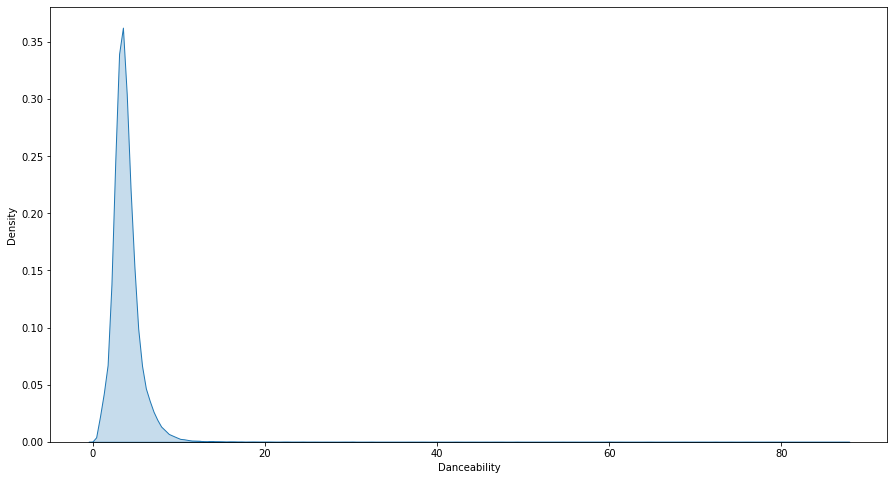

In [19]:
plt.figure(figsize=(15,8))

#plot
sns.kdeplot(music['duration_minutes'], fill = True)

#labels
plt.xlabel('Danceability')

#show plot
plt.show()

### **Explicit**

<AxesSubplot:xlabel='explicit', ylabel='count'>

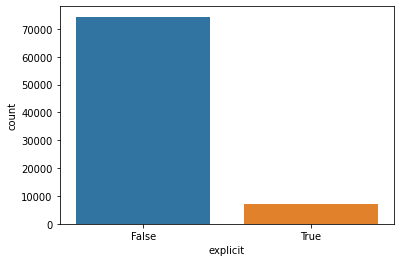

In [20]:
sns.countplot(data=music, x='explicit')

Incorporating songs featuring explicit content into a playlist for a corporate event differs from a personal or informal gathering. Corporate gatherings are designed to cultivate a professional and inclusive atmosphere. The inclusion of explicit content in songs may run counter to the intended tone of the event. In this context, it becomes crucial to uphold a standard of professionalism and ensure that the music selection aligns harmoniously with the company's core values and the expectations of the attendees.

#### In that case, we will drop all rows with explicit contents

In [21]:
#dropping all rows with explicit contents
music.drop(music[music['explicit'] == True].index, inplace=True)

#observing changes
music.explicit.value_counts()

False    74385
Name: explicit, dtype: int64

We also found a song titled `Bitches` that contain explicit content. This track will be dropped

In [22]:
music[music['track_name'] == 'Bitches']

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_minutes
13353,4Y9XI2RRd9w2Ll0fYVBduE,dj funk,Dance Mania: Ghetto Madness,Bitches,10,False,0.981,0.776,11,-7.288,0,0.259,0.0307,0.000005,0.185,0.727,128.106,4,chicago-house,2.7


#### drop song with Explicit title

In [23]:
music = music[music['track_name'] != 'Bitches']

In [24]:
#confirm if song has been dropped
music[music['track_name'] == 'Bitches']

,track_id,artists,album_name,track_name,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,duration_minutes


### **Genre**

In [ ]:
#convert genres to list and print set to return unique values
unique_genre = set(music.track_genre.tolist())
print(unique_genre)

Through visual observation, genres unusual genres like `study, sleep,sad, children, kids` and metal-like genres like `death-metal, metalcore and heavy-metal` do not fit into danceability for a general audience hence we drop them.

In [ ]:
genres_to_drop = ['study', 'sleep', 'sad', 'children', 'kids', 'death-metal', 'metalcore', 'heavy-metal']


#drop genres
music = music[music.track_genre.isin(genres_to_drop) == False]

music.sample(5)

While observing the bottom rows of the above output, we observed that most artists name are more common with gospel bands. 


In [ ]:
world_music = music[music['track_genre'] == 'world-music']
artists_name = world_music.artists.tolist()
print(artists_name)

#### Based on the findings above, it can be inferred that a major portion of the songs within the world music genres fall under the gospel category. While our model might categorize them as danceable, it's important to note that gospel songs may not be universally suitable, as they can be considered offensive to certain demographics. To mitigate this issue, we will exclude the world-music genre from consideration.

In [ ]:
music = music[music['track_genre'] != 'world-music']
music

## The Data

| Column     | Description              |
|------------|--------------------------|
| `track_id` | The Spotify ID number of the track. |
| `artists` | Names of the artists who performed the track, separated by a `;` if there's more than one.|
| `album_name` | The name of the album that includes the track.|
| `track_name` | The name of the track.|
| `popularity` | Numerical value ranges from `0` to `100`, with `100` being the highest popularity. This is calculated based on the number of times the track has been played recently, with more recent plays contributing more to the score. Duplicate tracks are scored independently.|
| `duration_ms` | The length of the track, measured in milliseconds.|
| `explicit` | Indicates whether the track contains explicit lyrics. `true` means it does, `false` means it does not or it's unknown.|
| `danceability` | A score ranges between `0.0` and `1.0` that represents the track's suitability for dancing. This is calculated by algorithm and is determined by factors like tempo, rhythm stability, beat strength, and regularity.|
| `energy` | A score ranges between `0.0` and `1.0` indicating the track's intensity and activity level. Energetic tracks tend to be fast, loud, and noisy.|
| `key` | The key the track is in. Integers map to pitches using standard Pitch class notation. E.g.`0 = C`, `1 = C♯/D♭`, `2 = D`, and so on. If no key was detected, the value is `-1`.| 
| `loudness` | The overall loudness, measured in decibels (dB).|
| `mode` |  The modality of a track, represented as `1` for major and `0` for minor.| 
| `speechiness` | Measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks.| 
| `acousticness` | A confidence measure ranges from `0.0` to `1.0`, with `1.0` representing the highest confidence that the track is acoustic.|
| `instrumentalness` | Instrumentalness estimates the likelihood of a track being instrumental. Non-lyrical sounds such as "ooh" and "aah" are considered instrumental, whereas rap or spoken word tracks are classified as "vocal". A value closer to `1.0` indicates a higher probability that the track lacks vocal content.|
| `liveness` | A measure of the probability that the track was performed live. Scores above `0.8` indicate a high likelihood of the track being live.|
| `valence` | A score from `0.0` to `1.0` representing the track's positiveness. High scores suggest a more positive or happier track.|
| `tempo` | The track's estimated tempo, measured in beats per minute (BPM).|
| `time_signature` | An estimate of the track's time signature (meter), which is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from `3` to `7` indicating time signatures of `3/4`, to `7/4`.|
| `track_genre` |  The genre of the track.|



Problem Definition for the Spotify Dataset:

The problem at hand is to analyze and extract valuable insights from the Spotify dataset, which contains a wide array of music-related information. This dataset offers a rich source of data about songs, artists, genres, and user interactions. The primary objectives and problem areas to explore include:

1. **Music Recommendation:**
   - Develop a recommendation system that recommends songs or playlist to an audience. Evaluate the system's accuracy and performance.

2. **Genre Classification:**
   - Create a model to accurately classify songs into their respective genres based on audio features, lyrics, or other relevant information.

3. **User Behavior Analysis:**
   - Explore and understand user behavior patterns, such as the most popular genres, time-based trends, and the impact of different features on user engagement.

4. **Feature Engineering:**
   - Investigate the significance of various audio features (e.g., tempo, valence, energy ) in predicting song danceability.

5. **Playlist Generation:**
   - Develop algorithms to automatically generate playlists that cater to specific moods, activities, or genres, considering factors like diversity and cohesion.

6. **Song Popularity Prediction:**
   - Build models to predict the popularity of songs based on their characteristics, release date, and artist information. Evaluate the accuracy of these predictions.

7. **Sentiment Analysis:**
   - Perform sentiment analysis on user-generated content, such as song reviews or comments, to gauge public sentiment towards artists, albums, or tracks.

8. **Market Insights:**
   - Extract insights for music industry stakeholders, including artists, record labels, and marketers, regarding trends in music consumption, emerging genres, and audience preferences.

9. **Lyrics Analysis:**
   - Analyze song lyrics to identify themes, sentiments, and topics that resonate with listeners. Investigate correlations between lyrical content and song popularity.

10. **Bias and Fairness:**
    - Assess and address potential bias in recommendation systems, ensuring that they provide diverse and inclusive music suggestions that cater to a broad user demographic.

11. **Collaborative Projects:**
    - Collaborate with artists or music producers to use the dataset for creative purposes, such as generating music, remixing tracks, or creating innovative interactive experiences.

The ultimate goal is to leverage the Spotify dataset to derive meaningful insights, improve user experiences, and contribute to the music industry's growth and innovation. This involves employing data analysis, machine learning, and domain expertise to address various challenges and opportunities within the music ecosystem.

# Data Preparation

### Danceability

We want our songs to be within a danceable range, so we will select songs above the average danceability value

In [ ]:
music.danceability.describe()

Select songs above the average danceability value

In [ ]:
music  = music[music['danceability'] >= 0.55]
music

### Energy

Since energy is the  intensity level of a song, this could imply that the higher the energy, the better the valence and the  more danceable the song will be. 

Although, this could not be depicted by the correlation plot, It was observed practically. This is to say that, there is a non-linear correlation between energy, valence, and danceability.

Based on this observation, we will select songs above average energy value

In [ ]:
music.energy.describe()

In [ ]:
music  = music[music['energy'] >= 0.66]
music

### Speechiness

Speechiness measures the amount of spoken words in a track. A value close to `1.0` denotes speech-based content, while `0.33` to `0.66` indicates a mix of speech and music like rap. Values below `0.33` are usually music and non-speech tracks. We only select tracks based on speechiness below 0.66 to contain song and rap music.

In [ ]:
music = music[music['speechiness'] < 0.66]
music

### Duration

In [ ]:
music.duration_minutes.describe()

The duration description shows that the lowest track duration is 50 secs and the maximum duration is 87  minutes. We will observe this using a scatter plot

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(music.duration_minutes)

The scatter plot shows that there are many outliers in based on their duration. We will define our outliers in duration based  on the mean value which means songs below `4 minutes will be considered outliers` and dropped.

In [ ]:
music = music[music['duration_minutes'] <= 4.0]

### Instrumetalness

Instrumentalness is the likelihood of a track lacking vocal content. Values closer to `1.0` indicates a higher probability that the track lacks vocal content. Songs without vocal content are still danceable if played for a short period of time. 

In [ ]:
music.instrumentalness.describe()

We will drop songs below the mean of the instrumentalness. This will help us filter out songs with too much speechy content that lacks instrrumentalness.

In [ ]:
music = music[music['instrumentalness'] <= 0.135]
music.head()

In situations demanding an unobtrusive musical backdrop, such as speeches or award presentations, tracks characterized by a pronounced instrumentalness can prove particularly fitting. However, our specific objective centers around crafting a vibrant playlist conducive to lively summer parties. Consequently, we opted to exclude songs exhibiting a heightened level of instrumentalness.

### Valence
 

#### removing songs with low valence by mean

In [ ]:
music.valence.describe()

In [ ]:
#remove songs with lower danceability
music = music[music['valence'] >= 0.6]

music

Valence in music represents its emotional tone, affecting how it makes listeners feel. It's a key element of emotional response. Higher valence means a more positive song, often invoking joy or happiness. Lower valence suggests emotions like sadness. Given our goal of creating a cheerful summer party playlist, we'll exclude songs with strongly low valence to ensure a positive atmosphere.

### Tempo


In [ ]:
music.tempo.describe()

#### Observing songs above our average tempo.

In [ ]:
music[music['tempo'] < 124].head(10)

The above songs were played and it was observe that the tempo is relative to the genre so, we 

In [ ]:
music=music[music['tempo'] > 124]
music

# **Univariate Analysis**

#### What is the distribution of Genres in this dataset?

In [ ]:
plt.figure(figsize=(18,10))
music.track_genre.value_counts().plot(kind='bar')


plt.ylabel('Genre Count')
plt.show()

The tango genre ( a genre of music from Argentina) appears the most in the dataset.

### Danceability

In [ ]:
plt.figure(figsize=(15,8))

#plot
sns.kdeplot(music['danceability'], fill = True)

#labels
plt.xlabel('Danceability')

#show plot
plt.show()

The danceability peaked at `0.6`. Danceability values 

In [ ]:
music.shape

### Popularity

In [ ]:
#plot size
plt.figure(figsize=(15,8))

#plot
sns.distplot(music['popularity'])

#label
plt.xlabel('Popularity')

#show plot
plt.show()

A lot of songs fall within 0 to 10, while the peak of the popularity is between 40 and 50. Though a track popularity of 0 maybe unpopular but we 
still factor them into our playlist because unpopular songs give good vibe when packed with good energy and rhythm.

### Energy

In [ ]:
#plot size
plt.figure(figsize=(15,8))

#plot
sns.kdeplot(music['energy'], fill = True)

#label
plt.xlabel('Energy')

#show plot
plt.show()

In [ ]:
music['energy'].describe()

The energy variable has a lot of values between 0.7 and 0.9. Hence, the multiple peaks although they values differ from each other

### Tempo

In [ ]:
#plot size
plt.figure(figsize=(15,8))

#plot
sns.kdeplot(music, x=music['tempo'], fill=True)

#label
plt.xlabel('Tempo')

#show plot
plt.show()

The tempo of our song averages at 125 

In [ ]:
#plot size
plt.figure(figsize=(15,8))

#plot
sns.kdeplot( x=music['valence'], fill=True)

#label
plt.xlabel('Valence')

plt.show()

## **Multivariate Analysis**

### Is there a linear relationship between variables in the dataset?
Observing the correlation between variables

In [ ]:
plt.figure(figsize=(15,8))

corr_plot = music.drop('explicit', axis=1)
sns.heatmap(corr_plot.corr(), annot=True, cmap='Paired')

Yes, there is a linear relationship between variable in the dataset. The map shows a **strong positive correlation** between `energy and loudness` and a **moderate positive correlation** `valence and danceability`. On the otherhand, `energy and acousticness` have a **strong negative correlation**  with `loudness and acousticness` having a **moderate negative correlation** with other columns having little or no correlation.


#### Energy and Loudness

In [ ]:
# danceable = music.groupby('track_name')['danceability'].mean()
#plot size
plt.figure(figsize=(15,8))

#plot
sns.regplot(data=music,  x=music.energy, y=music.loudness)

#setting plot title 
plt.title('Energy vs Loudness')
plt.xlabel('Loudness')
plt.ylabel('Energy')

#display plot
plt.show()

#### The plot shows there is a positive linear correlation between energy and loudness. This means that, the higher the energy, the louder the track

### Danceability and Valence

In [ ]:
# danceable = music.groupby('track_name')['danceability'].mean()
#plot size
plt.figure(figsize=(15,8))

#plot
sns.regplot(data=music,  x=music.valence, y=music.danceability)

#setting plot title 
plt.title('Danceability vs Valence')
plt.xlabel('Valence')
plt.ylabel('Danceability')

#display plot
plt.show()

### Energy and Danceability

In [ ]:
#plot size
plt.figure(figsize=(15,8))

#plot
sns.regplot(data=music,  x=music.acousticness, y=music.energy)

#setting plot title 
plt.title('Energy vs Acousticness')
plt.xlabel('Acousticness')
plt.ylabel('Energy')

#display plot
plt.show()

### **Artists vs Danceability**

In [ ]:
#plot size
plt.figure(figsize=(15,8))

#plot
sns.barplot(data=music,  x=danceable.sort_values(ascending=False).values[:20], y=danceable.index[:20], orient='h')

#setting plot title 
plt.title('Top 20 danceable tracks')
plt.xlabel('Danceability')
plt.ylabel('Track Name')

#display plot
plt.show()

### Tempo vs Genre

In [ ]:
tempo_genre = music.groupby('track_genre')['tempo'].mean()
#plot size
plt.figure(figsize=(15,8))

#plot
sns.barplot(data=music, y=tempo_genre.index[:20], x=tempo_genre.sort_values(ascending=False).values[:20], orient='h')

#setting plot title 
plt.title('Top 20 Genre by Tempo')
plt.xlabel('Average Tempo')
plt.ylabel('Track genre')

#display plot
plt.show()

The above chart shows the top 20 genres with the highest tempo. 

### Which Genre is the most Popular?

In [ ]:
genre_popularity = music.groupby('track_genre')['popularity'].mean()

#plot size
plt.figure(figsize=(15,8))

#plot
sns.barplot(data=music, y=genre_popularity.index[:20], x=genre_popularity.sort_values(ascending=False).values[:20], orient='h')

#setting plot title 
plt.title('Top 20 Popular Genre')
plt.xlabel('Popularity')
plt.ylabel('Track genre')

#display plot
plt.show()

The most popular genre is Acoustic, followed by Afrobeat and others.

### Which Genre is more danceable? 

In [ ]:
genre_danceability = music.groupby('track_genre')['danceability'].mean()

#plot size
plt.figure(figsize=(15,8))

#plot
sns.barplot(data=music, y=genre_danceability.index[:20], x=genre_danceability.sort_values(ascending=False).values[:20], orient='h')

#setting plot title 
plt.title('Top 20 Danceable Genres')
plt.xlabel('Danceability')
plt.ylabel('Track genre')

#display plot
plt.show()

In [ ]:
music

#### drop the above tracks

In [ ]:
grouped = music.groupby('track_name')['danceability'].mean()

#plot size
plt.figure(figsize = (10,3), dpi = 100)

#set the plot
sns.barplot(x = grouped.sort_values(ascending = False)[0:20].index, y = grouped.sort_values(ascending = False)[0:20].values)

#plot title and labels
plt.xlabel('track_name')
plt.ylabel('danceability')
plt.xticks(rotation = 90)
plt.title('20 Most danceable track')

#show plot
plt.show()

Determining the top 10 danceable genres would be beneficial in selecting the ideal genre for our party's song playlist. By analyzing the danceability of different genres, we can identify which genres are most likely to engage and energize the party attendees. This information allows us to curate a playlist that aligns with the desired atmosphere and ensures that the music resonates with the audience, enhancing their overall experience. By prioritizing the top 10 danceable genres, we increase the likelihood of creating a vibrant and enjoyable party atmosphere.
Analyzing the danceability of various genres and identifying the top 10 danceable genres is a valuable approach for song selection at our party. This strategy enables us to make informed decisions when choosing the genre for our playlist. By focusing on the genres that have proven to be highly danceable, we can enhance the party's energy levels and encourage attendees to actively participate in dancing and enjoying the music. The selection of these top 10 danceable genres ensures that our song choices align with the preferences of the audience, creating a memorable and enjoyable experience for everyone involved.

In [ ]:
grouped = music.groupby('artists')['danceability'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.scatterplot(x = grouped.sort_values(ascending = False)[0:20].index, y = grouped.sort_values(ascending = False)[0:20].values)


plt.xlabel('artists')
plt.xticks(rotation = 90)
plt.ylabel('danceability')
plt.title('Top 20 artists with danceable tracks')


plt.show()

After playing all of these songs, I am thoroughly convinced that these artists have an exceptional collection of party jams. Their music consistently sets the mood and creates an energetic atmosphere that is perfect for any celebration. The songs are lively, catchy, and have a contagious rhythm that keeps the crowd engaged and entertained. It is evident that these artists possess a talent for producing music that is specifically designed to get people on their feet and dancing. Overall, based on my experience with these songs, I can confidently say that these artists excel in creating top-notch party anthems that are sure to elevate any festive occasion.

In [ ]:
grouped = music.groupby('album_name')['danceability'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.histplot(x = grouped.sort_values(ascending = False)[0:20].index, y = grouped.sort_values(ascending = False)[0:20].values)


plt.xlabel('album_name')
plt.ylabel('danceability')
plt.xticks(rotation = 90)
plt.title('20 Most danceable Albums')


plt.show()

print(grouped.sort_values(ascending=False))

This album provides a wealth of danceable songs that would be perfect for our upcoming party. It offers a wide selection of tracks that are specifically designed to get people moving and grooving on the dance floor. From high-energy beats to infectious melodies, this album has it all. It is evident that the artists behind these songs understand the importance of creating music that is both enjoyable and dance-friendly. With this album, we can easily compile a playlist that will cater to the party's atmosphere and ensure that everyone has a great time.

In [ ]:
grouped = music.groupby('track_name')['popularity'].mean()

plt.figure(figsize = (10,3), dpi = 100)
sns.boxplot(x = grouped.sort_values(ascending = False)[0:20].index, y = grouped.sort_values(ascending = False)[0:20].values)
plt.xlabel('track_name')
plt.ylabel('popularity')
plt.xticks(rotation = 90)
plt.title('20 Most popular Tracks')
plt.show()

In [ ]:
grouped.sort_values(ascending=False)

The level of popularity has a significant influence on the danceability of a song. By obtaining the top 20 popular tracks, we can effectively identify the danceable songs that would be perfect for our party. Popularity serves as a reliable indicator of how well-received and enjoyed a song is by the general audience. Therefore, by focusing on the most popular tracks, we can be confident that they possess the qualities and characteristics that encourage people to get up and dance. Utilizing this approach will enable us to curate a playlist that guarantees a lively and energetic atmosphere, ensuring that our party is a resounding success.

In [ ]:
# groupTempo = music[(music['tempo'] >=110) & (music['tempo'] <=140)]
groupTempo = music[music['tempo'] >=124]

grouped = groupTempo.groupby('track_name')['tempo'].mean()
plt.figure(figsize = (10,7), dpi = 100)
sns.barplot(  y = grouped.sort_values( ascending = False)[0:20].index, x = grouped.sort_values( ascending = False)[0:20].values, orient='h')

#labels
plt.xlabel('Tracks')
plt.ylabel('Tempo')
plt.xticks(rotation = 90)
plt.title('Top 20 Tracks with Danceable Tempo')

#show plot
plt.show()

##### Recognizing that danceability is the crucial factor in determining which songs are suitable for a party, we utilized this metric to sort out the top 50 tracks that possess high danceability. By prioritizing danceability, we ensured that the selected songs have a rhythm, tempo, and overall vibe that naturally incite people to dance and enjoy themselves. This approach guarantees that our playlist is filled with energetic and engaging tracks that will keep the partygoers on their feet throughout the event. By focusing on danceability, we have curated a collection of songs that are perfectly tailored to create a lively and enjoyable atmosphere for everyone in attendance.

In [ ]:
music.sort_values(by = 'danceability', ascending = False)[['track_name','artists','track_genre','album_name']].head(50)

In [ ]:
spotify_filtered = music[(music['danceability'] > 0.8) & (music['popularity'] >= 80)].head(50)
spotify_filtered

In [ ]:
top10_tracks = Spotify.nlargest(10, 'danceability')

fig = px.bar(top10_tracks, x='track_name', y=['speechiness', 'energy', 'acousticness', 'valence'], barmode='group')
fig.show()

The dataset at hand provides a comprehensive collection of audio features for a wide range of songs, as well as the corresponding audio features for various genres. This wealth of information allows us to delve into the realm of music genres and conduct meaningful comparisons among them. By analyzing these audio features, we can uncover the unique differences in sound that define each genre. This dataset empowers us to explore the diverse sonic landscapes and understand the distinct characteristics that set genres apart from one another.

With this dataset, we can embark on an intriguing journey of musical exploration. By examining the audio features of different songs and genres, we gain valuable insights into how various genres diverge in terms of their sound qualities. From the rhythm and tempo to the tonality and energy, these audio features provide a comprehensive overview of the sonic elements that shape each genre's identity. By leveraging this dataset, we can uncover patterns, trends, and nuances that illuminate the rich tapestry of musical genres and deepen our understanding of the intricate world of music.

## Feature Scaling

In [ ]:
music.var()

#### Before scaling, we will drop the key and mode columns

In [ ]:
music.drop(['key', 'mode','explicit'], axis=1, inplace=True)

some features have very high variance. We will use the minmaxScaler to normalize the variance for the sake of our model

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = music.copy()

features_to_scale = ['popularity', 'tempo', 'loudness', 'duration_minutes']

# Option 1: Min-Max Scaling (Scaling to a specific range, e.g., [0, 1])
# Initialize the MinMaxScaler
min_max_scaler = MinMaxScaler()

# # Apply Min-Max scaling to the selected features
df[features_to_scale] = min_max_scaler.fit_transform(df[features_to_scale])

In [ ]:
df.var()

In [ ]:
print(music.columns.tolist())

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Load your dataset, which includes 'danceability' and other features.
# Replace 'your_dataset.csv' with your dataset file path.
df = music

# Define the target variable ('danceability') and feature columns.
X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'explicit', 'track_genre', 'danceability'], axis=1)  # Features
y = df['danceability']  # Target variable (continuous)

# Split the data into training and testing sets (or use cross-validation).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a RandomForestRegressor.
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to your training data.
regressor.fit(X_train, y_train)

# Get feature importances from the trained model.
feature_importances = regressor.feature_importances_

# Create a DataFrame to store feature names and their importance scores.
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort features by importance in descending order.
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# You can specify a threshold to select the top N features based on their importance.
top_n_features = 5  # Choose the desired number of top features.

# Select the top N features.
selected_features = feature_importance_df.head(top_n_features)['Feature']

# 'selected_features' now contains the names of the top N features based on their importance.
# selected_features

In [ ]:
selected_features

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor  # Import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# Define the target variable ('danceability') and feature columns.
X = df.drop(['danceability'], axis=1)  
y = df['danceability']

# Identify numerical and categorical columns.
numerical_cols = X.select_dtypes(include=['number']).columns
categorical_cols = X.select_dtypes(exclude=['number']).columns

# Define preprocessing steps for numerical and categorical features.
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    # Add other transformers as needed for numerical features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    # Add other transformers as needed for categorical features
])

# Combine preprocessing steps for both numerical and categorical features.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Initialize a RandomForestRegressor for regression.
regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Create a pipeline that includes preprocessing and the regressor.
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', regressor)])

# Fit the regression model to your data.
model.fit(X, y)

# You can now use the trained model for predicting danceability scores.
model.predict(y_test)

In [ ]:
df.columns

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

# Load your dataset, which includes 'danceability' and other features.
# Replace 'your_dataset.csv' with your dataset file path.

# Define the target variable ('danceability') and feature columns.
# X = df.drop(['danceability'], axis=1)  # Features
X = df.drop(['track_id', 'artists', 'album_name', 'track_name', 'popularity', 'explicit', 'track_genre', 'danceability', 'duration_minutes'], axis=1)  # Features

y = df['danceability']  # Target variable (continuous)



# Initialize a regression model (e.g., Linear Regression).
regressor = LinearRegression()  # You can choose another regression model

# Fit the regression model to the entire dataset.
regressor.fit(X, y)

# Make predictions for all songs in the dataset.
predictions = regressor.predict(X)

# Add the predicted danceability scores as a new column in the DataFrame.
df['predicted_danceability'] = predictions

# Rank the songs based on predicted danceability scores in descending order.
recommended_songs = df.sort_values(by='predicted_danceability', ascending=False).head(50)

# The 'recommended_songs' DataFrame now contains the top 50 songs recommended based on predicted danceability scores.


In [ ]:
recommended_songs

In [ ]:
predictions = regressor.predict(y)

# Add the predicted danceability scores as a new column in the DataFrame.
df['predicted_danceability'] = predictions

# Rank the songs based on predicted danceability scores in descending order.
recommended_songs = df.sort_values(by='predicted_danceability', ascending=False).head(50)

# The 'recommended_songs' DataFrame now contains the top 50 songs recommended based on predicted danceability scores.